In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from platform import python_version

%matplotlib inline

print("Python Version: ", python_version())
print("NetworkX Version: ", nx.__version__)

Python Version:  3.8.5
NetworkX Version:  2.5


### Read in data

In [2]:
#Create dataframe for directed graph: 
digraph = pd.read_csv("2_directed_graph.csv", index_col=0)
print("Shape of digraph :", digraph.shape)

#Create dataframe for undirected graph: 
undir_graph = pd.read_csv("2_undirected_graph.csv", index_col=0)
print("Shape of undirected graph :", undir_graph.shape)

Shape of digraph : (35838, 3)
Shape of undirected graph : (35838, 3)


In [3]:
digraph.head(2)

,From,To,weight
0,1.10043390.2@multexinvestornetwork.com,jwillia@enron.com,1.0
1,1.3594.f00jdu1qa40nkp.1@mailer.realage.com,brapp@enron.com,1.0


In [4]:
undir_graph.head(2)

,weight,src,dst
0,1.0,1.10043390.2@multexinvestornetwork.com,jwillia@enron.com
1,1.0,1.3594.f00jdu1qa40nkp.1@mailer.realage.com,brapp@enron.com


### Build the Graphs by Loading Data into NetworkX 

In [5]:
#Create a digraph from our dataframe using .from_pandas_edgelist() and setting create_using to nx.DiGraph()
G = nx.from_pandas_edgelist(digraph, 'From', 'To', edge_attr = ['weight'], create_using=nx.DiGraph())

#Create an undirected graph from our dataframe using .from_pandas_edgelist()
G_un = nx.from_pandas_edgelist(undir_graph, 'src', 'dst', edge_attr = ['weight'], create_using=nx.Graph())

In [6]:
#Check our results
print("Is G a digraph? ", G.is_directed())
print("Number of edges in G: ", len(G.edges()))
print('\n')
print("Is G_un a digraph? ", G_un.is_directed())
print("Number of edges in G_un: ", len(G_un.edges()))

Is G a digraph?  True
Number of edges in G:  35838


Is G_un a digraph?  False
Number of edges in G_un:  34651


In [7]:
#Check out a subset of edges to ensure that the edge attributes came through: 
print(G.edges(['phillip.allen@enron.com'], data=True))

[('phillip.allen@enron.com', 'andrea.richards@enron.com', {'weight': 1.0}), ('phillip.allen@enron.com', 'anne.bike@enron.com', {'weight': 1.0}), ('phillip.allen@enron.com', 'bs_stone@yahoo.com', {'weight': 1.0}), ('phillip.allen@enron.com', 'cbpres@austin.rr.com', {'weight': 1.5}), ('phillip.allen@enron.com', 'christi.nicolay@enron.com', {'weight': 0.0769230769230769}), ('phillip.allen@enron.com', 'fescofield@1411west.com', {'weight': 1.0}), ('phillip.allen@enron.com', 'fletcher.sturm@enron.com', {'weight': 0.5}), ('phillip.allen@enron.com', 'gallen@thermon.com', {'weight': 1.0}), ('phillip.allen@enron.com', 'hunter.shively@enron.com', {'weight': 0.5}), ('phillip.allen@enron.com', 'ina.rangel@enron.com', {'weight': 3.0}), ('phillip.allen@enron.com', 'jacquestc@aol.com', {'weight': 1.0}), ('phillip.allen@enron.com', 'james.steffes@enron.com', {'weight': 1.0769230769230769}), ('phillip.allen@enron.com', 'jeff.dasovich@enron.com', {'weight': 0.0769230769230769}), ('phillip.allen@enron.com

### Initialize a features dataframe, using the nodes as the index

In [8]:
df = pd.DataFrame(index=G.nodes())
print(df.shape)
df.head()

(14141, 0)


""
1.10043390.2@multexinvestornetwork.com
jwillia@enron.com
1.3594.f00jdu1qa40nkp.1@mailer.realage.com
brapp@enron.com
101qi@msn.com


In [9]:
#how many unique nodes do we have? 
df.index.nunique() 

14141

### Community Detection: Louvain

We will be working with Louvain and our custom community detection algorithm to see how our people cluster in the dataset. We will use the undirected graph to extract community-based features. 

#### NOTE: To use Louvain, you will need to pip install python-louvain at your command prompt before running the next block of code 

In [10]:
import community as community_louvain

In [11]:
#Run the algorithm on the undirected graph, without weights
partition_orig = community_louvain.best_partition(G_un, random_state=101)

#Run the algorithm on the undirected graph, with weights 
partition_orig_weighted = community_louvain.best_partition(G_un, weight='weight', random_state=101)

In [12]:
#Put community information into our features dataframe: 
#df['louvain_orig_noweight'] = pd.Series(partition_orig)
df['louvain'] = pd.Series(partition_orig_weighted)

In [13]:
df.head()

,louvain
1.10043390.2@multexinvestornetwork.com,0
jwillia@enron.com,0
1.3594.f00jdu1qa40nkp.1@mailer.realage.com,1
brapp@enron.com,1
101qi@msn.com,2


### Community Detection: Custom Louvain

For this project, we altered the way modularity is caluculated and resolved in the original Louvain algorithm. You will notice that if you downloaded this code from Github, there is a Custom Louvain folder that was included in that zip file. Simply place that folder in the same folder that this notebook is located and run it. There is no need to pip install everything as long as you put the Custom Louvain folder in the correct place. 

In [14]:
'''
#Commenting this out for Google Colab Use. Cannot import custom packages easily into Colab so we will skip this step. 
#You can run this code in another IDE (Jupyter, Spyder) after putting CustomLouvain folder in this directory subfolder. 


from CustomLouvain import louvain_modified

#Run the algorithm on the undirected graph, without weights
partition_mod = louvain_modified.best_partition(G_un, random_state=101)

#Run the algorithm on the undirected graph, with weights 
partition_mod_weighted = louvain_modified.best_partition(G_un, weight='weight', random_state=101)

#Extract partition stats to our features dataframe: 
df['louvain_custom'] = pd.Series(partition_mod)
#df['louvain_custom_weight'] = pd.Series(partition_mod_weighted)
df.head()

print('Partition count for custom Louvain with weights:  ', len(set([v for u,v in partition_mod_weighted.items()])))

'''

"\n#Commenting this out for Google Colab Use. Cannot import custom packages easily into Colab so we will skip this step. \n#You can run this code in another IDE (Jupyter, Spyder) after putting CustomLouvain folder in this directory subfolder. \n\n\nfrom CustomLouvain import louvain_modified\n\n#Run the algorithm on the undirected graph, without weights\npartition_mod = louvain_modified.best_partition(G_un, random_state=101)\n\n#Run the algorithm on the undirected graph, with weights \npartition_mod_weighted = louvain_modified.best_partition(G_un, weight='weight', random_state=101)\n\n#Extract partition stats to our features dataframe: \ndf['louvain_custom'] = pd.Series(partition_mod)\n#df['louvain_custom_weight'] = pd.Series(partition_mod_weighted)\ndf.head()\n\n"

### Evaluate How the Community Detection Algorithms Performed

In [15]:
#How many communities did each one find? 
#print('Partition count for Louvain with weights: ', len(set([v for u,v in partition_orig_weighted.items()])))
print('Partition count for Louvain: ', len(set([v for u,v in partition_orig.items()])))

Partition count for Louvain:  200


#### Cluster Breakdown - Louvain

In [16]:
ken_louv = int(df.loc['kenneth.lay@enron.com']['louvain'])
jeff_louv = int(df.loc['jeff.skilling@enron.com']['louvain'])
andy_louv = int(df.loc['andrew.fastow@enron.com']['louvain'])
lou_louv = int(df.loc['lou.pai@enron.com']['louvain'])
cliff_louv = int(df.loc['cliff.baxter@enron.com']['louvain'])

print('Cluster Assignments for each Fraudster - Louvain:')
print('-----------------------------------------------')
print('Ken:  ' + str(ken_louv))
print('Jeff:  ' + str(jeff_louv))
print('Andy:  ' + str(andy_louv))
print('Lou:  ' + str(lou_louv))
print('Cliff:  ' + str(cliff_louv))

print('\n')
#How many people are in each of these subsets? 
print("Number of people in each Louvain cluster:")
print('-----------------------------------------')
print('Ken, Jeff, Lou & Cliff:  ', len(df[df['louvain']==ken_louv]))
print('Andy:  ', len(df[df['louvain']==andy_louv]))
print('Weeded Out Results:  ', len(df) - len(df[df['louvain']==ken_louv]) - len(df[df['louvain']==andy_louv]))

Cluster Assignments for each Fraudster - Louvain:
-----------------------------------------------
Ken:  19
Jeff:  19
Andy:  9
Lou:  19
Cliff:  19


Number of people in each Louvain cluster:
-----------------------------------------
Ken, Jeff, Lou & Cliff:   784
Andy:   1157
Weeded Out Results:   12200


#### Cluster Breakdown - Custom Louvain

In [17]:
'''

#Commenting this out for Google Colab Use. Cannot import custom packages easily into Colab so we will skip this step. 
#You can run this code in another IDE (Jupyter, Spyder) after putting CustomLouvain folder in this directory subfolder.

ken_clouv = int(df.loc['kenneth.lay@enron.com']['louvain_custom'])
jeff_clouv = int(df.loc['jeff.skilling@enron.com']['louvain_custom'])
andy_clouv = int(df.loc['andrew.fastow@enron.com']['louvain_custom'])
lou_clouv = int(df.loc['lou.pai@enron.com']['louvain_custom'])
cliff_clouv = int(df.loc['cliff.baxter@enron.com']['louvain_custom'])

print('Cluster Assignments for each Fraudster - Custom Louvain:')
print('-----------------------------------------------------------')
print('Ken:  ' + str(ken_clouv))
print('Jeff:  ' + str(jeff_clouv))
print('Andy:  ' + str(andy_clouv))
print('Lou:  ' + str(lou_clouv))
print('Cliff:  ' + str(cliff_clouv))

print('\n')
#How many people are in each of these subsets? 
print("Number of people in each custom Louvain cluster:")
print('---------------------------------------------------')
print("Ken: ", len(df[df['louvain_custom']==ken_clouv]))
print("Jeff: ", len(df[df['louvain_custom']==jeff_clouv]))
print("Andy: ", len(df[df['louvain_custom']==andy_clouv]))
print("Lou: ", len(df[df['louvain_custom']==lou_clouv]))
print("Cliff: ", len(df[df['louvain_custom']==cliff_clouv]))

print("Weeded out results: ", 
      len(df) - 
      len(df[df['louvain_custom']==ken_clouv]) - 
      len(df[df['louvain_custom']==jeff_clouv]) - 
      len(df[df['louvain_custom']==andy_clouv]) - 
      len(df[df['louvain_custom']==lou_clouv]) - 
      len(df[df['louvain_custom']==cliff_clouv]))
      
'''

'\n\n#Commenting this out for Google Colab Use. Cannot import custom packages easily into Colab so we will skip this step. \n#You can run this code in another IDE (Jupyter, Spyder) after putting CustomLouvain folder in this directory subfolder.\n\nken_clouv = int(df.loc[\'kenneth.lay@enron.com\'][\'louvain_custom\'])\njeff_clouv = int(df.loc[\'jeff.skilling@enron.com\'][\'louvain_custom\'])\nandy_clouv = int(df.loc[\'andrew.fastow@enron.com\'][\'louvain_custom\'])\nlou_clouv = int(df.loc[\'lou.pai@enron.com\'][\'louvain_custom\'])\ncliff_clouv = int(df.loc[\'cliff.baxter@enron.com\'][\'louvain_custom\'])\n\nprint(\'Cluster Assignments for each Fraudster - Custom Louvain:\')\nprint(\'-----------------------------------------------------------\')\nprint(\'Ken:  \' + str(ken_clouv))\nprint(\'Jeff:  \' + str(jeff_clouv))\nprint(\'Andy:  \' + str(andy_clouv))\nprint(\'Lou:  \' + str(lou_clouv))\nprint(\'Cliff:  \' + str(cliff_clouv))\n\nprint(\'\n\')\n#How many people are in each of these s

### Gather More Node-Based Graph features

In [18]:
#Weighted Degree features
df['in-degree_weighted'] = pd.Series(dict(G.in_degree(weight='weight'))).round(3).astype(float)
df['out-degree_weighted'] = pd.Series(dict(G.out_degree(weight='weight'))).round(3).astype(float)

#Fill NaN values with 0: 
df.fillna(0, inplace=True)
df.head()

,louvain,in-degree_weighted,out-degree_weighted
1.10043390.2@multexinvestornetwork.com,0,0.0,1.0
jwillia@enron.com,0,3.0,0.0
1.3594.f00jdu1qa40nkp.1@mailer.realage.com,1,0.0,1.0
brapp@enron.com,1,1.0,0.0
101qi@msn.com,2,0.0,1.0


In [19]:
#Check for singletons - we should not have this in our graph: 
[(u,v) for u,v in dict(G.degree()).items() if v < 1]

[]

In [20]:
#Centrality Measures: 
df['degree-centrality'] = pd.Series(nx.degree_centrality(G))
df['indegree-centrality'] = pd.Series(nx.in_degree_centrality(G))
df['outdegree-centrality'] = pd.Series(nx.out_degree_centrality(G))
#Closeness centrality: Since the graph is disconnected, use wf_improved to normalize by fraction of nodes reached
df['closeness-centrality'] = pd.Series(nx.closeness_centrality(G, wf_improved=True))
df['pagerank'] = pd.Series(nx.pagerank(G, alpha=.85))
hub, auth = nx.hits(G)
df['hubs'] = pd.Series(dict(hub.items()))
df['authorities'] = pd.Series(dict(auth.items()))

In [21]:
'''
#Betweenness centrality -- NOTE: This takes a very long time to run! Feel free to run it, but you will be waiting. :) 
df['betweenness-centrality'] = pd.Series(nx.betweenness_centrality(G, normalized=True, endpoints=False))
df.head()
'''

"\n#Betweenness centrality -- NOTE: This takes a very long time to run! Feel free to run it, but you will be waiting. :) \ndf['betweenness-centrality'] = pd.Series(nx.betweenness_centrality(G, normalized=True, endpoints=False))\ndf.head()\n"

In [22]:
df.shape

(14141, 10)

In [23]:
df.head(2)

,louvain,in-degree_weighted,out-degree_weighted,degree-centrality,indegree-centrality,outdegree-centrality,closeness-centrality,pagerank,hubs,authorities
1.10043390.2@multexinvestornetwork.com,0,0.0,1.0,0.000071,0.000000,0.000071,0.000000,0.000056,1.642557e-90,0.000000e+00
jwillia@enron.com,0,3.0,0.0,0.000212,0.000212,0.000000,0.000212,0.000198,0.000000e+00,6.505822e-89


### Apply One-Hot Encoding of Louvain Results: 

In [24]:
#We will one-hot enocode the results from the Louvain algorithm -- feel free to run again with custom Louvain! :o)
one_hot = pd.get_dummies(df['louvain'], drop_first=True)

#Concatenate dummy variables and drop columns we don't need: 
dropcols = ['louvain']
df_hot = pd.concat([df.drop(dropcols, axis=1), one_hot], axis=1)

In [25]:
df_hot.head(3)

,in-degree_weighted,out-degree_weighted,degree-centrality,indegree-centrality,outdegree-centrality,closeness-centrality,pagerank,hubs,authorities,1,...,190,191,192,193,194,195,196,197,198,199
1.10043390.2@multexinvestornetwork.com,0.0,1.0,0.000071,0.000000,0.000071,0.000000,0.000056,1.642557e-90,0.000000e+00,0,...,0,0,0,0,0,0,0,0,0,0
jwillia@enron.com,3.0,0.0,0.000212,0.000212,0.000000,0.000212,0.000198,0.000000e+00,6.505822e-89,0,...,0,0,0,0,0,0,0,0,0,0
1.3594.f00jdu1qa40nkp.1@mailer.realage.com,0.0,1.0,0.000071,0.000000,0.000071,0.000000,0.000056,6.462013e-103,0.000000e+00,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_hot.shape

(14141, 208)

In [27]:
#Send to CSV for Ensemble Learning pipeline: 
df_hot.to_csv('3_graph_features.csv')

### Apply Feature Scaling 
Put everything except the values that have been one-hot encoded into the same units

In [28]:
from sklearn.preprocessing import StandardScaler

#Make a copy of our one-hot encoded df: 
df_scaled = df_hot.copy()

sc = StandardScaler()

In [29]:
#The columns we will be scaling: 
df_scaled.columns[0:9]

Index(['in-degree_weighted', 'out-degree_weighted', 'degree-centrality',
       'indegree-centrality', 'outdegree-centrality', 'closeness-centrality',
       'pagerank', 'hubs', 'authorities'],
      dtype='object')

In [30]:
#Apply standardization to the columns 
#NOTE: We do not apply to columns that have been one-hot-encoded, so we take the columns at index 0:10:
df_scaled[df_scaled.columns[0:9]] = sc.fit_transform(df_scaled[df_scaled.columns[0:9]])

df_scaled.head(2)

,in-degree_weighted,out-degree_weighted,degree-centrality,indegree-centrality,outdegree-centrality,closeness-centrality,pagerank,hubs,authorities,1,...,190,191,192,193,194,195,196,197,198,199
1.10043390.2@multexinvestornetwork.com,-0.195174,0.095901,-0.214250,-0.499428,-0.091658,-1.270464,-0.165920,-0.009256,-0.021494,0,...,0,0,0,0,0,0,0,0,0,0
jwillia@enron.com,0.906938,-0.108709,-0.108933,0.091767,-0.151396,-1.253648,1.401175,-0.009256,-0.021494,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#Send to CSV for Ensemble Learning Pipeline: 
df_scaled.to_csv('3_graph_features_scaled.csv')

# K-means clustering

We have the louvain algorithm clusters, which may be all we need, however let's try using KMeans to cluster the graph with all of the degree measures. 

First, we need to find the optimal number of clusters

Next we Cluster results based on optimal number of clusters

Finally, we reduce the dimensionality of the results with PCA and plot results

In [32]:
from sklearn.cluster import KMeans

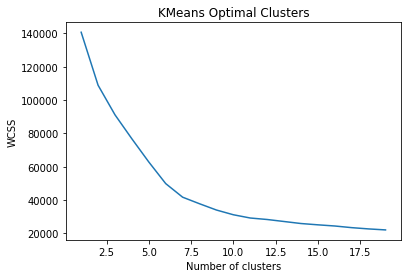

In [33]:
#Find optimal clusters of scaled data (This takes some time): 
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('KMeans Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
#Select the 10-cluster model and view results: 
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
#Create the dependent variable, which are the clusters KMeans assigns to each person
y_kmeans = kmeans.fit_predict(df_scaled)

#View the cluster assignments
print(y_kmeans)

[3 3 3 ... 3 3 3]


### Visualize

First we reduce the dimensions of the data using PCA with 2 components

In [35]:
from sklearn.decomposition import PCA

#Use PCA to reduce dimensions of our dataset
pca = PCA(n_components=2)

#Fit the model to our data: 
pca.fit(df_scaled)

#Transform the model data: 
x_pca = pca.transform(df_scaled)

print(df_scaled.shape)
print('\n')
print(x_pca.shape)

#Add principal components to a dataframe we can use to plot individual points on our scatterplot
df_pca = pd.DataFrame(index=df_scaled.index)
df_pca['pca1'] = x_pca[:,0]
df_pca['pca2'] = x_pca[:,1]
df_pca['cluster'] = y_kmeans
df_pca.head()

(14141, 208)


(14141, 2)


,pca1,pca2,cluster
1.10043390.2@multexinvestornetwork.com,-0.625174,-0.074500,3
jwillia@enron.com,0.737626,0.681640,3
1.3594.f00jdu1qa40nkp.1@mailer.realage.com,-0.625189,-0.074494,3
brapp@enron.com,-0.250097,0.202791,3
101qi@msn.com,-0.625189,-0.074494,3


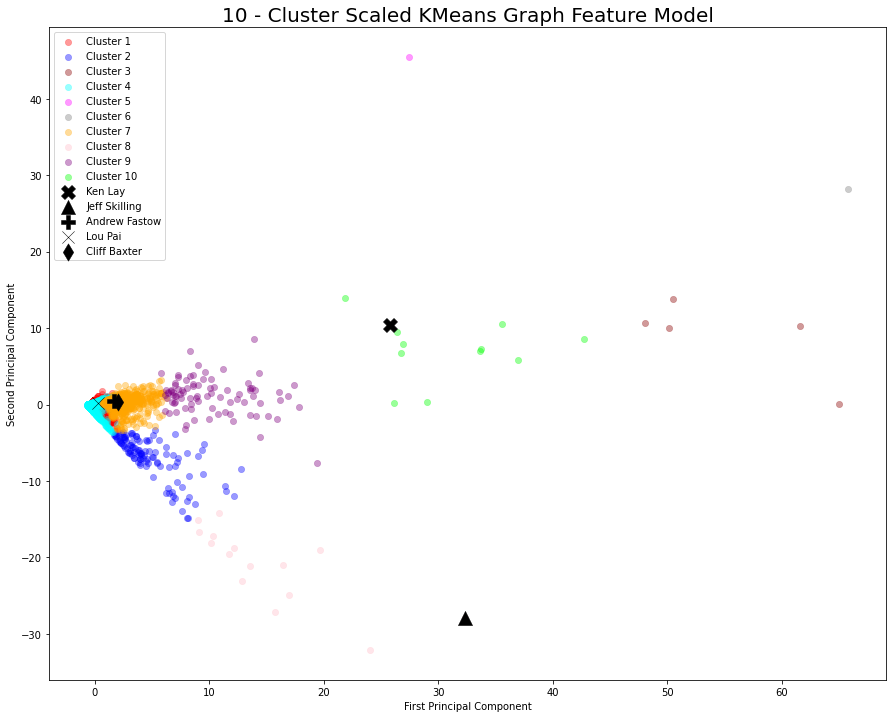

In [36]:
#Plot the cluster data, coloring the plot by cluster assignment: 
plt.figure(figsize = (15,12))
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1], s = 40, alpha=.4, linewidths=.5, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1], s = 40, alpha=.4, linewidths=.5, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1], s = 40, alpha=.4, linewidths=.5, c = 'darkred', label = 'Cluster 3')
plt.scatter(x_pca[y_kmeans==3,0],x_pca[y_kmeans==3,1], s = 40, alpha=.4, linewidths=.5, c = 'cyan', label = 'Cluster 4')
plt.scatter(x_pca[y_kmeans==4,0],x_pca[y_kmeans==4,1], s = 40, alpha=.4, linewidths=.5, c = 'magenta', label = 'Cluster 5')
plt.scatter(x_pca[y_kmeans==5,0],x_pca[y_kmeans==5,1], s = 40, alpha=.4, linewidths=.5, c = 'gray', label = 'Cluster 6')
plt.scatter(x_pca[y_kmeans==6,0],x_pca[y_kmeans==6,1], s = 40, alpha=.4, linewidths=.5, c = 'orange', label = 'Cluster 7')
plt.scatter(x_pca[y_kmeans==7,0],x_pca[y_kmeans==7,1], s = 40, alpha=.4, linewidths=.5, c = 'pink', label = 'Cluster 8')
plt.scatter(x_pca[y_kmeans==8,0],x_pca[y_kmeans==8,1], s = 40, alpha=.4, linewidths=.5, c = 'purple', label = 'Cluster 9')
plt.scatter(x_pca[y_kmeans==9,0],x_pca[y_kmeans==9,1], s = 40, alpha=.4, linewidths=.5, c = 'lime', label = 'Cluster 10')

plt.scatter(df_pca.loc['kenneth.lay@enron.com'][0], df_pca.loc['kenneth.lay@enron.com'][1], s = 200, linewidths=.5, c = 'black', marker = 'X', label = 'Ken Lay')
plt.scatter(df_pca.loc['jeff.skilling@enron.com'][0], df_pca.loc['jeff.skilling@enron.com'][1], s = 200, linewidths=.5, c = 'black', marker = '^', label = 'Jeff Skilling')
plt.scatter(df_pca.loc['andrew.fastow@enron.com'][0], df_pca.loc['andrew.fastow@enron.com'][1], s = 200, linewidths=.5, c = 'black', marker = 'P', label = 'Andrew Fastow')
plt.scatter(df_pca.loc['lou.pai@enron.com'][0], df_pca.loc['lou.pai@enron.com'][1], s = 150, linewidths=.5, c = 'black',  marker = 'x', label = 'Lou Pai')
plt.scatter(df_pca.loc['cliff.baxter@enron.com'][0], df_pca.loc['cliff.baxter@enron.com'][1], s = 150, linewidths=.5, c = 'black', marker = 'd', label = 'Cliff Baxter')


#plt.scatter(ctr_pca10[:, 0], ctr_pca10[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('10 - Cluster Scaled KMeans Graph Feature Model', fontsize=20)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.show()

### Which clusters contain Jeffrey Skilling, Ken Lay, Andrew Fastow, Lou Pai & J. Clifford Baxter?

Given the rest of the graph statistics, will those be better cluster predictors for each person? 

In [37]:
ken_skmean = int(df_pca.loc['kenneth.lay@enron.com']['cluster'])
jeff_skmean = int(df_pca.loc['jeff.skilling@enron.com']['cluster'])
andy_skmean = int(df_pca.loc['andrew.fastow@enron.com']['cluster'])
lou_skmean = int(df_pca.loc['lou.pai@enron.com']['cluster'])
cliff_skmean = int(df_pca.loc['cliff.baxter@enron.com']['cluster'])

print('Cluster Assignments of Fraudsters Using All Graph Features via 10-Cluster Kmeans with feature scaling:')
print('-------------------------------------------------------------------------------------------------------')
print('Ken:  ' + str(ken_skmean))
print('Jeff:  ' + str(jeff_skmean))
print('Andy:  ' + str(andy_skmean))
print('Lou:  ' + str(lou_skmean))
print('Cliff:  ' + str(cliff_skmean))

print('\n')
#How many people are in each of these subsets? 
print('Number of people in each cluster:')
print('---------------------------------')
print("Ken:  ", len(df_pca[df_pca['cluster']==ken_skmean]))
print("Jeff:  ", len(df_pca[df_pca['cluster']==jeff_skmean]))
print("Andy & Cliff:  ", len(df_pca[df_pca['cluster']==andy_skmean]))
print("Lou:  ", len(df_pca[df_pca['cluster']==lou_skmean]))

print("Everyone Else:  ", len(df_pca) - len(df_pca[df_pca['cluster']==ken_skmean]) - len(df_pca[df_pca['cluster']==jeff_skmean])- len(df_pca[df_pca['cluster']==andy_skmean]) - len(df_pca[df_pca['cluster']==lou_skmean]))

Cluster Assignments of Fraudsters Using All Graph Features via 10-Cluster Kmeans with feature scaling:
-------------------------------------------------------------------------------------------------------
Ken:  9
Jeff:  7
Andy:  6
Lou:  0
Cliff:  6


Number of people in each cluster:
---------------------------------
Ken:   12
Jeff:   15
Andy & Cliff:   765
Lou:   7936
Everyone Else:   5413


In [38]:
#Who is in the same cluster with Ken? 
df_pca[df_pca['cluster']==ken_skmean]

,pca1,pca2,cluster
john.lavorato@enron.com,29.035689,0.379653,9
louise.kitchen@enron.com,33.647745,7.020469,9
sally.beck@enron.com,42.715191,8.625413,9
richard.shapiro@enron.com,36.924771,5.766665,9
chris.germany@enron.com,26.133196,0.166590,9
kenneth.lay@enron.com,25.742593,10.384272,9
daren.farmer@enron.com,26.399085,9.491518,9
benjamin.rogers@enron.com,26.689638,6.765668,9
kate.symes@enron.com,26.914534,7.953967,9
mark.taylor@enron.com,35.562242,10.534773,9


In [39]:
#Who is in the same cluster with Jeff? 
df_pca[df_pca['cluster']==jeff_skmean]

,pca1,pca2,cluster
david.forster@enron.com,19.615911,-19.087867,7
jeff.skilling@enron.com,32.297922,-27.929582,7
outlook.team@enron.com,13.587436,-21.155044,7
araceli.romero@enron.com,10.352440,-17.143297,7
rosalee.fleming@enron.com,23.987375,-32.141899,7
cheryl.johnson@enron.com,12.186224,-18.835995,7
rhonda.denton@enron.com,10.817829,-14.221347,7
veronica.espinoza@enron.com,16.946512,-24.975564,7
liz.taylor@enron.com,16.460291,-21.036156,7
thomas.engel@enron.com,8.998220,-15.095410,7


### Try KMeans without feature scaling: 

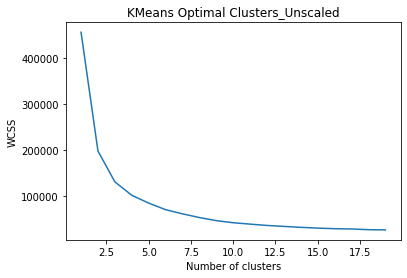

In [40]:
#Find optimal clusters of scaled data (This takes some time): 
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_hot)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('KMeans Optimal Clusters_Unscaled')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
#Select the 6-cluster model and view results: 
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
#Create the dependent variable, which are the clusters KMeans assigns to each person
y_kmeans = kmeans.fit_predict(df_hot)

#Check out cluster assignments
print(y_kmeans)

[0 0 0 ... 0 0 0]


### Visualize

In [42]:
#Use PCA to reduce dimensions of our dataset
pca = PCA(n_components=2)

#Fit the model to our data: 
pca.fit(df_hot)

#Transform the model data: 
x_pca = pca.transform(df_hot)

print(df_hot.shape)
print('\n')
print(x_pca.shape)

#Add principal components to a dataframe we can use to plot individual points on our scatterplot
df_pca2 = pd.DataFrame(index=df_hot.index)
df_pca2['pca1'] = x_pca[:,0]
df_pca2['pca2'] = x_pca[:,1]
df_pca2['cluster'] = y_kmeans
df_pca2.head()

(14141, 208)


(14141, 2)


,pca1,pca2,cluster
1.10043390.2@multexinvestornetwork.com,0.224181,-0.672298,0
jwillia@enron.com,0.473950,2.479971,0
1.3594.f00jdu1qa40nkp.1@mailer.realage.com,0.224181,-0.672299,0
brapp@enron.com,-0.306388,0.638577,0
101qi@msn.com,0.224181,-0.672299,0


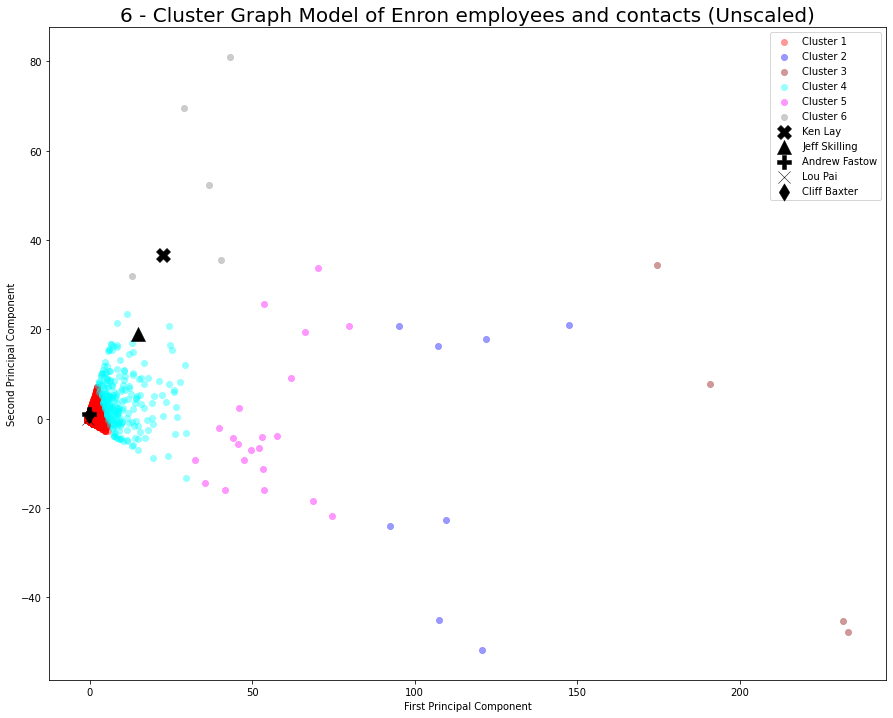

In [43]:
#Plot the cluster data, coloring the plot by cluster assignment: 
plt.figure(figsize = (15,12))
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1], s = 40, alpha=.4, linewidths=.5, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1], s = 40, alpha=.4, linewidths=.5, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1], s = 40, alpha=.4, linewidths=.5, c = 'darkred', label = 'Cluster 3')
plt.scatter(x_pca[y_kmeans==3,0],x_pca[y_kmeans==3,1], s = 40, alpha=.4, linewidths=.5, c = 'cyan', label = 'Cluster 4')
plt.scatter(x_pca[y_kmeans==4,0],x_pca[y_kmeans==4,1], s = 40, alpha=.4, linewidths=.5, c = 'magenta', label = 'Cluster 5')
plt.scatter(x_pca[y_kmeans==5,0],x_pca[y_kmeans==5,1], s = 40, alpha=.4, linewidths=.5, c = 'gray', label = 'Cluster 6')


plt.scatter(df_pca2.loc['kenneth.lay@enron.com'][0], df_pca2.loc['kenneth.lay@enron.com'][1], s = 200, linewidths=.5, c = 'black', marker = 'X', label = 'Ken Lay')
plt.scatter(df_pca2.loc['jeff.skilling@enron.com'][0], df_pca2.loc['jeff.skilling@enron.com'][1], s = 200, linewidths=.5, c = 'black', marker = '^', label = 'Jeff Skilling')
plt.scatter(df_pca2.loc['andrew.fastow@enron.com'][0], df_pca2.loc['andrew.fastow@enron.com'][1], s = 200, linewidths=.5, c = 'black', marker = 'P', label = 'Andrew Fastow')
plt.scatter(df_pca2.loc['lou.pai@enron.com'][0], df_pca2.loc['lou.pai@enron.com'][1], s = 150, linewidths=.5, c = 'black',  marker = 'x', label = 'Lou Pai')
plt.scatter(df_pca2.loc['cliff.baxter@enron.com'][0], df_pca2.loc['cliff.baxter@enron.com'][1], s = 150, linewidths=.5, c = 'black', marker = 'd', label = 'Cliff Baxter')


#plt.scatter(ctr_pca10[:, 0], ctr_pca10[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('6 - Cluster Graph Model of Enron employees and contacts (Unscaled)', fontsize=20)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.show()

In [44]:
### Let's find out which cluster Jeffrey Skilling, Ken Lay, Andrew Fastow, Lou Pai & J. Clifford Baxter are in. 

In [45]:
ken_kmean = int(df_pca2.loc['kenneth.lay@enron.com']['cluster'])
jeff_kmean = int(df_pca2.loc['jeff.skilling@enron.com']['cluster'])
andy_kmean = int(df_pca2.loc['andrew.fastow@enron.com']['cluster'])
lou_kmean = int(df_pca2.loc['lou.pai@enron.com']['cluster'])
cliff_kmean = int(df_pca2.loc['cliff.baxter@enron.com']['cluster'])

print('Cluster Assignments of Fraudsters Using All Graph Features via 6-Cluster Kmeans without feature scaling:')
print('-------------------------------------------------------------------------------------------------------')
print('Ken:  ' + str(ken_kmean))
print('Jeff:  ' + str(jeff_kmean))
print('Andy:  ' + str(andy_kmean))
print('Lou:  ' + str(lou_kmean))
print('Cliff:  ' + str(cliff_kmean))
print('\n')

#How many people are in each of these subsets?
print('Number of people in each cluster:')
print('--------------------------------')
print("Ken:  ", len(df_pca2[df_pca2['cluster']==ken_kmean]))
print("Jeff:  ", len(df_pca2[df_pca2['cluster']==jeff_kmean]))
print("Andy, Lou, & Cliff:  ", len(df_pca2[df_pca2['cluster']==andy_kmean]))

print("Everyone Else:  ", len(df_pca) - len(df_pca2[df_pca2['cluster']==ken_kmean]) - len(df_pca2[df_pca2['cluster']==jeff_kmean])- len(df_pca2[df_pca2['cluster']==andy_kmean]))

Cluster Assignments of Fraudsters Using All Graph Features via 6-Cluster Kmeans without feature scaling:
-------------------------------------------------------------------------------------------------------
Ken:  5
Jeff:  3
Andy:  0
Lou:  0
Cliff:  0


Number of people in each cluster:
--------------------------------
Ken:   6
Jeff:   239
Andy, Lou, & Cliff:   13863
Everyone Else:   33


# Which Graph ML model do you think is best? Why? 

### Proceed to "3_Ensemble_Pipeline_LunchLearn.ipynb"